In [43]:
pip install dill

Note: you may need to restart the kernel to use updated packages.


In [45]:
import dill
dill.dump_session('updateNotebook.db')


In [3]:
import dill
dill.load_session("updateNotebook.db")

In [2]:
%matplotlib inline
import qiime2
from tempfile import mkdtemp
from qiime2.plugins import demux, deblur, quality_filter, \
                           metadata, feature_table, alignment, \
                           phylogeny, diversity, emperor, feature_classifier, \
                           taxa, composition


In [3]:
!mkdir qiime2-atacama-tutorial

mkdir: cannot create directory ‘qiime2-atacama-tutorial’: File exists


In [4]:
workdir='./'

In [5]:
!wget \
  -O "sample-metadata.tsv" \
  "https://data.qiime2.org/2020.8/tutorials/atacama-soils/sample_metadata.tsv"

--2020-12-07 19:53:13--  https://data.qiime2.org/2020.8/tutorials/atacama-soils/sample_metadata.tsv
Resolving data.qiime2.org (data.qiime2.org)... 52.35.38.247
Connecting to data.qiime2.org (data.qiime2.org)|52.35.38.247|:443... connected.
HTTP request sent, awaiting response... 302 FOUND
Location: https://docs.google.com/spreadsheets/d/1OZtpMzJ0vRhRk_1DA3nYuhA-OLfo6MZYHIHAqRbKVB4/export?gid=0&format=tsv [following]
--2020-12-07 19:53:16--  https://docs.google.com/spreadsheets/d/1OZtpMzJ0vRhRk_1DA3nYuhA-OLfo6MZYHIHAqRbKVB4/export?gid=0&format=tsv
Resolving docs.google.com (docs.google.com)... 216.58.206.142, 2a00:1450:4009:811::200e
Connecting to docs.google.com (docs.google.com)|216.58.206.142|:443... connected.
HTTP request sent, awaiting response... 307 Temporary Redirect
Location: https://doc-0k-6o-sheets.googleusercontent.com/export/l5l039s6ni5uumqbsj9o11lmdc/11hlo289a1pq6e25rp1n87el9o/1607367195000/103995680502445084602/*/1OZtpMzJ0vRhRk_1DA3nYuhA-OLfo6MZYHIHAqRbKVB4?gid=0&format=

In [6]:
!mkdir emp-paired-end-sequences

In [11]:
!wget \
  -O "emp-paired-end-sequences/forward.fastq.gz" \
  "https://data.qiime2.org/2020.8/tutorials/atacama-soils/10p/forward.fastq.gz"

--2020-12-07 20:31:37--  https://data.qiime2.org/2020.8/tutorials/atacama-soils/10p/forward.fastq.gz
Resolving data.qiime2.org (data.qiime2.org)... 52.35.38.247
Connecting to data.qiime2.org (data.qiime2.org)|52.35.38.247|:443... connected.
HTTP request sent, awaiting response... 302 FOUND
Location: https://s3-us-west-2.amazonaws.com/qiime2-data/2020.8/tutorials/atacama-soils/10p/forward.fastq.gz [following]
--2020-12-07 20:31:39--  https://s3-us-west-2.amazonaws.com/qiime2-data/2020.8/tutorials/atacama-soils/10p/forward.fastq.gz
Resolving s3-us-west-2.amazonaws.com (s3-us-west-2.amazonaws.com)... 52.218.253.96
Connecting to s3-us-west-2.amazonaws.com (s3-us-west-2.amazonaws.com)|52.218.253.96|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 143193967 (137M) [binary/octet-stream]
Saving to: ‘emp-paired-end-sequences/forward.fastq.gz’

emp-paired-end-sequ 100%[===================>] 136.56M   576KB/s    in 5m 47s  

2020-12-07 20:37:27 (403 KB/s) - ‘emp-paired-en

In [10]:
!wget \
  -O "emp-paired-end-sequences/reverse.fastq.gz" \
  "https://data.qiime2.org/2020.8/tutorials/atacama-soils/10p/reverse.fastq.gz"

--2020-12-07 20:28:56--  https://data.qiime2.org/2020.8/tutorials/atacama-soils/10p/reverse.fastq.gz
Resolving data.qiime2.org (data.qiime2.org)... 52.35.38.247
Connecting to data.qiime2.org (data.qiime2.org)|52.35.38.247|:443... connected.
HTTP request sent, awaiting response... 302 FOUND
Location: https://s3-us-west-2.amazonaws.com/qiime2-data/2020.8/tutorials/atacama-soils/10p/reverse.fastq.gz [following]
--2020-12-07 20:28:57--  https://s3-us-west-2.amazonaws.com/qiime2-data/2020.8/tutorials/atacama-soils/10p/reverse.fastq.gz
Resolving s3-us-west-2.amazonaws.com (s3-us-west-2.amazonaws.com)... 52.218.241.40
Connecting to s3-us-west-2.amazonaws.com (s3-us-west-2.amazonaws.com)|52.218.241.40|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 161032441 (154M) [binary/octet-stream]
Saving to: ‘emp-paired-end-sequences/reverse.fastq.gz’

emp-paired-end-sequ 100%[===================>] 153.57M  1.55MB/s    in 2m 13s  

2020-12-07 20:31:12 (1.15 MB/s) - ‘emp-paired-e

In [9]:
!wget \
  -O "emp-paired-end-sequences/barcodes.fastq.gz" \
  "https://data.qiime2.org/2020.8/tutorials/atacama-soils/10p/barcodes.fastq.gz"

--2020-12-07 20:27:49--  https://data.qiime2.org/2020.8/tutorials/atacama-soils/10p/barcodes.fastq.gz
Resolving data.qiime2.org (data.qiime2.org)... 52.35.38.247
Connecting to data.qiime2.org (data.qiime2.org)|52.35.38.247|:443... connected.
HTTP request sent, awaiting response... 302 FOUND
Location: https://s3-us-west-2.amazonaws.com/qiime2-data/2020.8/tutorials/atacama-soils/10p/barcodes.fastq.gz [following]
--2020-12-07 20:27:50--  https://s3-us-west-2.amazonaws.com/qiime2-data/2020.8/tutorials/atacama-soils/10p/barcodes.fastq.gz
Resolving s3-us-west-2.amazonaws.com (s3-us-west-2.amazonaws.com)... 52.218.250.72
Connecting to s3-us-west-2.amazonaws.com (s3-us-west-2.amazonaws.com)|52.218.250.72|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 19976093 (19M) [binary/octet-stream]
Saving to: ‘emp-paired-end-sequences/barcodes.fastq.gz’

emp-paired-end-sequ 100%[===================>]  19.05M  2.27MB/s    in 20s     

2020-12-07 20:28:12 (987 KB/s) - ‘emp-paired-

In [5]:
#IMPORTING DATA AS QIIME2 ATIFACT
pair_end_sequences = qiime2.Artifact.import_data('EMPPairedEndSequences', workdir+'/emp-paired-end-sequences')

In [46]:
pair_end_sequences

<artifact: EMPPairedEndSequences uuid: 5cb3b93a-9cd6-4402-aaff-e2f477871205>

In [6]:
sample_metadata = qiime2.Metadata.load(workdir+'/sample-metadata.tsv')

In [7]:
#Demultiplexing processs
demux_sequences = demux.methods.emp_paired(pair_end_sequences,
                                           sample_metadata.get_column('barcode-sequence'),golay_error_correction =False,rev_comp_mapping_barcodes= True)

In [47]:
demux_sequences.per_sample_sequences

<artifact: SampleData[PairedEndSequencesWithQuality] uuid: 7d4c5fab-a12f-43dc-87c5-65f534518130>

In [8]:
demux_summary = demux.visualizers.summarize(demux_sequences.per_sample_sequences)
demux_summary.visualization

<visualization: Visualization uuid: 6cc73ed5-ffaf-489e-a8f5-3d7e493809a1>

<Figure size 432x288 with 0 Axes>

In [9]:
 # Filter, denoise, pair, and remove chimeras

from qiime2.plugins.dada2.methods import denoise_paired

clean_seq=denoise_paired(demux_sequences.per_sample_sequences,
                     trunc_len_f =150,trunc_len_r =150,
                     trim_left_f=13,trim_left_r=13, n_threads=4)



Running external command line application(s). This may print messages to stdout and/or stderr.
The command(s) being run are below. These commands cannot be manually re-run as they will depend on temporary files that no longer exist.

Command: run_dada_paired.R /tmp/tmps6z00d6w/forward /tmp/tmps6z00d6w/reverse /tmp/tmps6z00d6w/output.tsv.biom /tmp/tmps6z00d6w/track.tsv /tmp/tmps6z00d6w/filt_f /tmp/tmps6z00d6w/filt_r 150 150 13 13 2.0 2.0 2 independent consensus 1.0 4 1000000



In [48]:
clean_seq

Results (name = value)
---------------------------------------------------------------------------------------------------------
table                    = <artifact: FeatureTable[Frequency] uuid: 1b9a02a7-5d42-41c8-a5fd-a412d8ffb409>
representative_sequences = <artifact: FeatureData[Sequence] uuid: b5a0986e-83e1-4089-8265-833b12389233>
denoising_stats          = <artifact: SampleData[DADA2Stats] uuid: 8a7f6dc5-8825-4994-8117-1192d4074860>

In [10]:
#Visualize representative sequences
dada_seq_viz = feature_table.visualizers.tabulate_seqs(clean_seq.representative_sequences)
dada_seq_viz.visualization 


<visualization: Visualization uuid: d5b03524-2df0-4eab-91ed-c0a7f4aac6d0>

/home/elvictor/anaconda3/envs/qiime2-2020.8/lib/python3.6/site-packages/q2_feature_table/_summarize/_visualizer.py:122: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  os.path.join(output_dir, 'sample-frequency-detail.csv'))
/home/elvictor/anaconda3/envs/qiime2-2020.8/lib/python3.6/site-packages/q2_feature_table/_summarize/_visualizer.py:124: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  os.path.join(output_dir, 'feature-frequency-detail.csv'))


<visualization: Visualization uuid: 33968190-fa7c-41d4-ac2e-2b4e51de96ed>

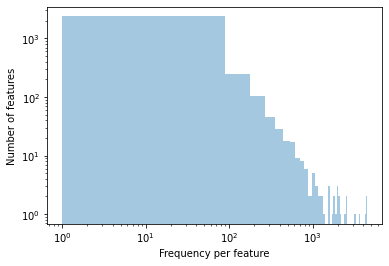

In [11]:
#Visualize feature table

feature_table_viz = feature_table.visualizers.summarize(clean_seq.table,
                                                        sample_metadata)
feature_table_viz.visualization

# Taxonomic analysis

In [23]:

#https://pubmed.ncbi.nlm.nih.gov/28593197/

!wget \
  -O "gg-13-8-99-515-806-nb-classifier.qza" \
  "https://data.qiime2.org/2020.8/common/gg-13-8-99-515-806-nb-classifier.qza"

--2020-12-07 21:03:25--  https://data.qiime2.org/2020.8/common/gg-13-8-99-515-806-nb-classifier.qza
Resolving data.qiime2.org (data.qiime2.org)... 52.35.38.247
Connecting to data.qiime2.org (data.qiime2.org)|52.35.38.247|:443... connected.
HTTP request sent, awaiting response... 302 FOUND
Location: https://s3-us-west-2.amazonaws.com/qiime2-data/2020.8/common/gg-13-8-99-515-806-nb-classifier.qza [following]
--2020-12-07 21:03:27--  https://s3-us-west-2.amazonaws.com/qiime2-data/2020.8/common/gg-13-8-99-515-806-nb-classifier.qza
Resolving s3-us-west-2.amazonaws.com (s3-us-west-2.amazonaws.com)... 52.218.136.64
Connecting to s3-us-west-2.amazonaws.com (s3-us-west-2.amazonaws.com)|52.218.136.64|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 28285585 (27M) [binary/octet-stream]
Saving to: ‘gg-13-8-99-515-806-nb-classifier.qza’

gg-13-8-99-515-806- 100%[===================>]  26.97M  1.36MB/s    in 35s     

2020-12-07 21:04:02 (799 KB/s) - ‘gg-13-8-99-515-806-nb-c

In [24]:
!qiime tools export --input-path $workdir/gg-13-8-99-515-806-nb-classifier.qza --output-path $workdir/classifier


Exported .//gg-13-8-99-515-806-nb-classifier.qza as TaxonomicClassiferTemporaryPickleDirFmt to directory .//classifier


In [25]:
gg_classifier = qiime2.Artifact.import_data('TaxonomicClassifier', workdir+'/classifier/')


In [26]:
taxonomy = feature_classifier.methods.classify_sklearn(reads = clean_seq.representative_sequences,
                                                       classifier = gg_classifier)

In [27]:
taxonomy_classification = metadata.visualizers.tabulate(taxonomy.classification.view(qiime2.Metadata))
taxonomy_classification.visualization

<visualization: Visualization uuid: c24a973a-1ffc-4503-aa94-f0c95c47b93a>

In [28]:
taxa_bar_plot = taxa.visualizers.barplot(clean_seq.table, taxonomy.classification, sample_metadata)
taxa_bar_plot.visualization

<visualization: Visualization uuid: 152db80a-2b6a-4038-9a4b-a1ae6a5f4464>

# Differential abundance testing with ANCOM

In [29]:
#Differential abundance testing with ANCOM¶
BAQ1370_site = feature_table.methods.filter_samples(clean_seq.table,
                                                  metadata = sample_metadata,
                                                  where = "siteName='BAQ1370'")

In [30]:
BAQ1370_site_composition = composition.actions.add_pseudocount(BAQ1370_site.filtered_table)

ancom_BAQ1370_site = composition.actions.ancom(table = BAQ1370_site_composition.composition_table,
                                             metadata = sample_metadata.get_column('transectName'))

ValueError: All values in `grouping` are unique. This method cannot operate on a grouping vector with only unique values (e.g., there are no 'within' variance because each group of samples contains only a single sample).

# #Generate a tree for phylogenetic diversity analyses¶

In [31]:
#Generate a tree for phylogenetic diversity analyses¶
#First, we perform a multiple sequence alignment of the sequences in our FeatureData[Sequence] 
#to create a FeatureData[AlignedSequence] QIIME 2 artifact. Here we do this with the mafft program
mafft_alignment = alignment.methods.mafft(clean_seq.representative_sequences, n_threads='auto')


Running external command line application. This may print messages to stdout and/or stderr.
The command being run is below. This command cannot be manually re-run as it will depend on temporary files that no longer exist.

Command: mafft --preservecase --inputorder --thread -1 /tmp/qiime2-archive-dsakr9v6/b5a0986e-83e1-4089-8265-833b12389233/data/dna-sequences.fasta



In [32]:
#Next, we mask (or filter) the alignment to remove positions that are highly variable. 
#These positions are generally considered to add noise to a resulting phylogenetic tree.
masked_mafft_alignment = alignment.methods.mask(mafft_alignment.alignment)


In [33]:
#Next, we’ll apply FastTree to generate a phylogenetic tree from the masked alignment.
unrooted_tree = phylogeny.methods.fasttree(masked_mafft_alignment.masked_alignment)

Running external command line application. This may print messages to stdout and/or stderr.
The command being run is below. This command cannot be manually re-run as it will depend on temporary files that no longer exist.

Command: FastTree -quote -nt /tmp/qiime2-archive-q_jzr_k5/4bbe21e3-2d45-4cdd-8f27-3eda9b9bf12d/data/aligned-dna-sequences.fasta



In [34]:
#The FastTree program creates an unrooted tree, so in the final step in this section 
#we apply midpoint rooting to place the root of the tree at the midpoint of the longest tip-to-tip distance in the unrooted tree.
rooted_tree = phylogeny.methods.midpoint_root(unrooted_tree.tree)


# Alpha and beta diversity analysis¶


In [35]:
core_metrics = diversity.pipelines.core_metrics_phylogenetic(table = clean_seq.table,
                                                             phylogeny = rooted_tree.rooted_tree,
                                                             sampling_depth = 1109,
                                                             metadata = sample_metadata)

/home/elvictor/anaconda3/envs/qiime2-2020.8/lib/python3.6/site-packages/sklearn/metrics/pairwise.py:1761: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
/home/elvictor/anaconda3/envs/qiime2-2020.8/lib/python3.6/site-packages/skbio/stats/ordination/_principal_coordinate_analysis.py:152: RuntimeWarning: The result contains negative eigenvalues. Please compare their magnitude with the magnitude of some of the largest positive eigenvalues. If the negative ones are smaller, it's probably safe to ignore them, but if they are large in magnitude, the results won't be useful. See the Notes section for more details. The smallest eigenvalue is -0.011284496461492186 and the largest is 0.8807872254293366.
  RuntimeWarning


# alpha group significance¶


In [36]:
faith_pd_group_significance = diversity.actions.alpha_group_significance(core_metrics.faith_pd_vector,
                                                                         sample_metadata)

In [37]:
evenness_group_significance = diversity.actions.alpha_group_significance(core_metrics.evenness_vector,
                                                                         sample_metadata)

In [38]:
faith_pd_group_significance.visualization

<visualization: Visualization uuid: 9e4cf73c-08e6-43af-b4c1-0cb1404ec046>

In [39]:
evenness_group_significance.visualization

<visualization: Visualization uuid: c0d60710-2ef0-4d45-a2e1-38a1a0efcbcc>

# beta group significance¶


In [41]:
uUniFrac_siteName_significance = diversity.actions.beta_group_significance(core_metrics.unweighted_unifrac_distance_matrix,
                                                                           sample_metadata.get_column('siteName'))

<Figure size 432x288 with 0 Axes>

In [42]:
uUniFrac_siteName_significance.visualization

<visualization: Visualization uuid: 13cd00a0-f3e5-478c-bd32-126aca9f0ced>